In [81]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, classification_report

from sklearn.cluster import KMeans
from xgboost import XGBClassifier
import xgboost as xgb
import lightgbm as lgb

from sklearn.model_selection import (
  KFold, StratifiedKFold, RepeatedStratifiedKFold, cross_val_score, GridSearchCV, train_test_split )

# 데이터 불러오기

In [54]:
data=pd.read_csv('/content/drive/MyDrive/4조/data/kpop data albtotrck (20220129).csv')
data=data.drop(columns=['Unnamed: 0'], axis=1)
data.head()

,Artist,Artist_Id,Album_Name,Album_Id,Track_Title,Track_Id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,H.O.T.,5JrfgZAgqAMywJpLpJM0eS,FOREVER 2001 LIVE CONCERT,697cPaD568S5Zt4bgo4cQf,Opening - Live,6KOn7RweqUBSZWoKKkHFRb,0.209,0.963,6.0,-12.900,0.0,0.1330,0.00009,0.913000,0.322,0.0829,131.864,90333.0,4.0
1,H.O.T.,5JrfgZAgqAMywJpLpJM0eS,FOREVER 2001 LIVE CONCERT,697cPaD568S5Zt4bgo4cQf,I yah! - Live,1khANf67sdS8kUkjmF218J,0.397,0.901,4.0,-6.970,1.0,0.2850,0.06650,0.000000,0.888,0.2580,171.944,278333.0,4.0
2,H.O.T.,5JrfgZAgqAMywJpLpJM0eS,FOREVER 2001 LIVE CONCERT,697cPaD568S5Zt4bgo4cQf,Git It Up! / 전사의 후예 / You Got Gun - Live,4XkT2bHdbHMPukCpj7mXPJ,0.542,0.913,1.0,-7.763,1.0,0.2410,0.10800,0.000315,0.890,0.3770,97.051,320533.0,4.0
3,H.O.T.,5JrfgZAgqAMywJpLpJM0eS,FOREVER 2001 LIVE CONCERT,697cPaD568S5Zt4bgo4cQf,Opening Ment - Live,65a4TY00ChiawzHVH4xcDO,0.436,0.666,10.0,-14.143,0.0,0.6320,0.92500,0.000267,0.855,0.0800,107.013,284427.0,5.0
4,H.O.T.,5JrfgZAgqAMywJpLpJM0eS,FOREVER 2001 LIVE CONCERT,697cPaD568S5Zt4bgo4cQf,It's Been Raining Since You Left Me / Delight ...,3vYZaL9lMZ1uKURbcEq4Jz,0.366,0.778,7.0,-9.239,0.0,0.0714,0.16400,0.000214,0.891,0.4040,99.995,278667.0,4.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16330 entries, 0 to 16329
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            16330 non-null  object 
 1   Artist_Id         16330 non-null  object 
 2   Album_Name        16330 non-null  object 
 3   Album_Id          16330 non-null  object 
 4   Track_Title       16330 non-null  object 
 5   Track_Id          16322 non-null  object 
 6   danceability      16322 non-null  float64
 7   energy            16322 non-null  float64
 8   key               16322 non-null  float64
 9   loudness          16322 non-null  float64
 10  mode              16322 non-null  float64
 11  speechiness       16322 non-null  float64
 12  acousticness      16322 non-null  float64
 13  instrumentalness  16322 non-null  float64
 14  liveness          16322 non-null  float64
 15  valence           16322 non-null  float64
 16  tempo             16322 non-null  float6

In [69]:
data2=pd.read_csv('/content/drive/MyDrive/4조/data/single_album_track_data(20220129).csv')
data2=data2.drop(columns=['Unnamed: 0'], axis=1)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11013 entries, 0 to 11012
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Artist             11013 non-null  object 
 1   Artist_Id          11013 non-null  object 
 2   Single_Album_Name  11013 non-null  object 
 3   Single_Album_Id    11013 non-null  object 
 4   Track_Title        11013 non-null  object 
 5   Track_Id           11009 non-null  object 
 6   danceability       11009 non-null  float64
 7   energy             11009 non-null  float64
 8   key                11009 non-null  float64
 9   loudness           11009 non-null  float64
 10  mode               11009 non-null  float64
 11  speechiness        11009 non-null  float64
 12  acousticness       11009 non-null  float64
 13  instrumentalness   11009 non-null  float64
 14  liveness           11009 non-null  float64
 15  valence            11009 non-null  float64
 16  tempo              110

In [53]:
data2.isna().sum()

Artist               0
Artist_Id            0
Single_Album_Name    0
Single_Album_Id      0
Track_Title          0
Track_Id             4
danceability         4
energy               4
key                  4
loudness             4
mode                 4
speechiness          4
acousticness         4
instrumentalness     4
liveness             4
valence              4
tempo                4
duration_ms          4
time_signature       4
dtype: int64

In [ ]:
data['Album_Name'].unique()

array(['FOREVER 2001 LIVE CONCERT', '99 LIVE IN SEOUL (Live)',
       'Outside Castle -The 5th Album', ...,
       'Love Synonym #1: Right for Me', 'Interior', 'A.G.E. (21)'],
      dtype=object)

In [ ]:
data2['Single_Album_Name'].unique()

array(["DON'T LOOK BACK", 'ALL FOR YOU', 'THREE WORDS', ..., 'Handle You',
       'Monochrome', 'Point Of View: U'], dtype=object)

- data : 정규앨범, 미니앨범
- data2 : 싱글앨범
?


In [ ]:
data['Artist'].value_counts()

F.T. Island     841
CNBLUE          523
Super Junior    515
TVXQ            397
BIGBANG         396
               ... 
Mirani            7
Park Boram        7
DEAN              7
Eddy Kim          7
RM                7
Name: Artist, Length: 206, dtype: int64

In [ ]:
data['Artist'].value_counts().head(10)

F.T. Island      841
CNBLUE           523
Super Junior     515
TVXQ             397
BIGBANG          396
SHINee           384
iKON             365
BoA              345
EXO              317
Lee Soo Young    289
Name: Artist, dtype: int64

In [ ]:
data2['Artist'].value_counts()

BoA               151
Yoon Jong Shin    133
BTOB              132
BIGBANG           129
MAMAMOO           127
                 ... 
Monday Kiz          2
IVE                 2
Jihyo               1
Seotaiji            1
JENNIE              1
Name: Artist, Length: 271, dtype: int64

## 이상치?

In [ ]:
data['time_signature'].value_counts()
#박자표

4.0    15505
3.0      611
5.0      141
1.0       63
0.0        2
Name: time_signature, dtype: int64

0/4박자 ?

In [ ]:
data[data['time_signature']==0]

,Artist,Artist_Id,Album_Name,Album_Id,Track_Title,Track_Id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
8227,Drunken Tiger,1kcYSWblYWOOMVOPNgbMYI,Year of The Tiger,0bU84bQLsRzW4THAlnQGw0,Skit,4E2LnDrU58sVPiTCWINUjU,0.0,0.787,9.0,-7.402,0.0,0.0,0.574,0.000,0.131,0.0,0.0,10081.0,0.0
11020,F.T. Island,6KhH771vq2X2Aom91nNzpZ,Live-2014 Arena Tour -The Passion-,6G0S6m7lGtdoKVid8TyvGb,Opening (Live-2014 Arena Tour -The Passion-@Ni...,1wPjNA59JSnJRp5uinQMAU,0.0,0.765,6.0,-17.168,0.0,0.0,0.532,0.858,0.397,0.0,0.0,102352.0,0.0


In [ ]:
data.loc[11020]

Artist                                                    F.T. Island
Artist_Id                                      6KhH771vq2X2Aom91nNzpZ
Album_Name                         Live-2014 Arena Tour -The Passion-
Album_Id                                       6G0S6m7lGtdoKVid8TyvGb
Track_Title         Opening (Live-2014 Arena Tour -The Passion-@Ni...
Track_Id                                       1wPjNA59JSnJRp5uinQMAU
danceability                                                      0.0
energy                                                          0.765
key                                                               6.0
loudness                                                      -17.168
mode                                                              0.0
speechiness                                                       0.0
acousticness                                                    0.532
instrumentalness                                                0.858
liveness            

- Drunken Tiger [Year of The Tiger] 10.skit 
  - 음성만 있음.

In [ ]:
data2['time_signature'].value_counts()

4.0    10481
3.0      407
5.0       95
1.0       24
0.0        2
Name: time_signature, dtype: int64

In [ ]:
data2[data2['time_signature']==0]

,Artist,Artist_Id,Single_Album_Name,Single_Album_Id,Track_Title,Track_Id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
6193,Sway D,3HfWEOcXit3EkuRCt5M3Yd,Noppakku!!!,544PxZvYCyDvOQU87roU9L,KB 499402-01-349605,5i0ZyiI5yTsVXu6PjTPEOv,0.0,0.557,0.0,-7.453,1.0,0.0,0.584,0.002970,0.0992,0.0,0.0,14571.0,0.0
9471,Kim Dong Ryul,3zYyfrb4r6ZHI5Di0rB9bV,Reply,0SzjJswYnrdHCVbAOr4sum,Moonlight,3r2mLo9pKHVOxXxXxPud6N,0.0,0.305,3.0,-8.951,1.0,0.0,0.736,0.000007,0.0952,0.0,0.0,258594.0,0.0


In [ ]:
data.select_dtypes("object").columns

Index(['Artist', 'Artist_Id', 'Album_Name', 'Album_Id', 'Track_Title',
       'Track_Id'],
      dtype='object')

In [ ]:
data.select_dtypes(exclude='object').columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

In [ ]:
cat_col=['Artist', 'Artist_Id', 'Album_Name', 'Album_Id', 'Track_Title',
       'Track_Id', 'key', 'mode', 'time_signature']
num_col=['danceability', 'energy',  'loudness', 'speechiness', 'acousticness',
         'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

## 분포

In [ ]:
ZtoO_col=['acousticness', 'danceability', 'energy', 'instrumentalness', 'valence', 'liveness', 'speechiness']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Box(y=data['acousticness'],name='Acousticness'))
fig.add_trace(go.Box(y=data['danceability'],name='danceability'))
fig.add_trace(go.Box(y=data['energy'],name='energy'))
fig.add_trace(go.Box(y=data['instrumentalness'],name='instrumentalness'))
fig.add_trace(go.Box(y=data['valence'],name='valence'))
fig.add_trace(go.Box(y=data['liveness'],name='liveness'))
fig.add_trace(go.Box(y=data['speechiness'],name='speechiness'))

fig.show()

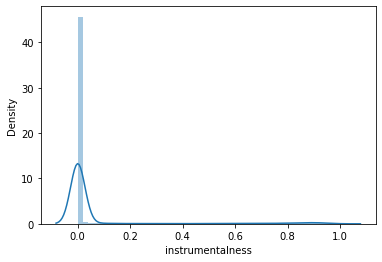

In [ ]:
sns.distplot(data['instrumentalness'],label='instrumentalness')
plt.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Box(y=data2['acousticness'],name='Acousticness'))
fig.add_trace(go.Box(y=data2['danceability'],name='danceability'))
fig.add_trace(go.Box(y=data2['energy'],name='energy'))
fig.add_trace(go.Box(y=data2['instrumentalness'],name='instrumentalness'))
fig.add_trace(go.Box(y=data2['valence'],name='valence'))
fig.add_trace(go.Box(y=data2['liveness'],name='liveness'))
fig.add_trace(go.Box(y=data2['speechiness'],name='speechiness'))

fig.show()

## 상관관계

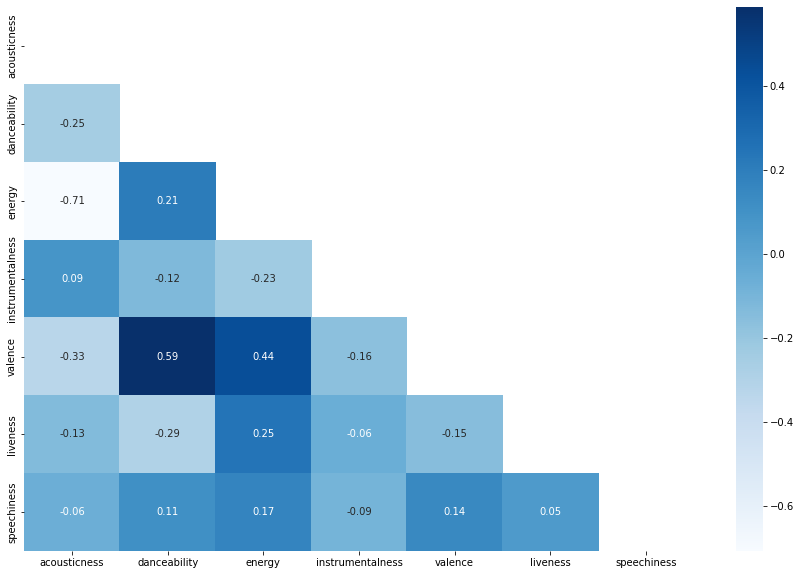

In [ ]:
def makeCorr(x, width=25, height=12):
  plt.figure( figsize=(width, height) )
  mask = np.zeros_like(x.corr(), dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True
  sns.heatmap(x.corr(), annot=True, fmt='.2f', mask=mask, cmap='Blues')
  plt.show()

makeCorr(data[ZtoO_col], width=15, height=10 )

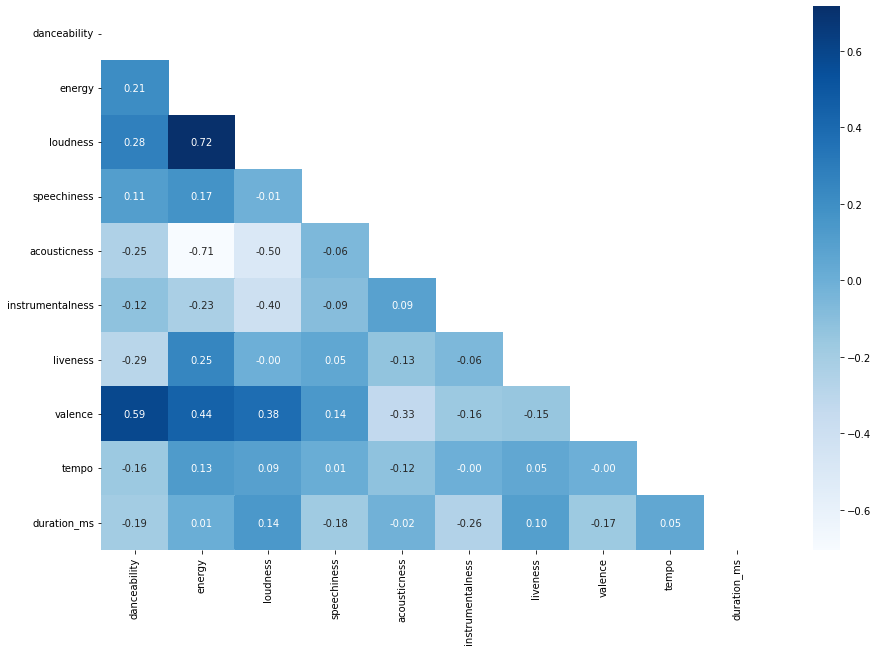

In [ ]:
makeCorr(data[num_col], width=15, height=10 )

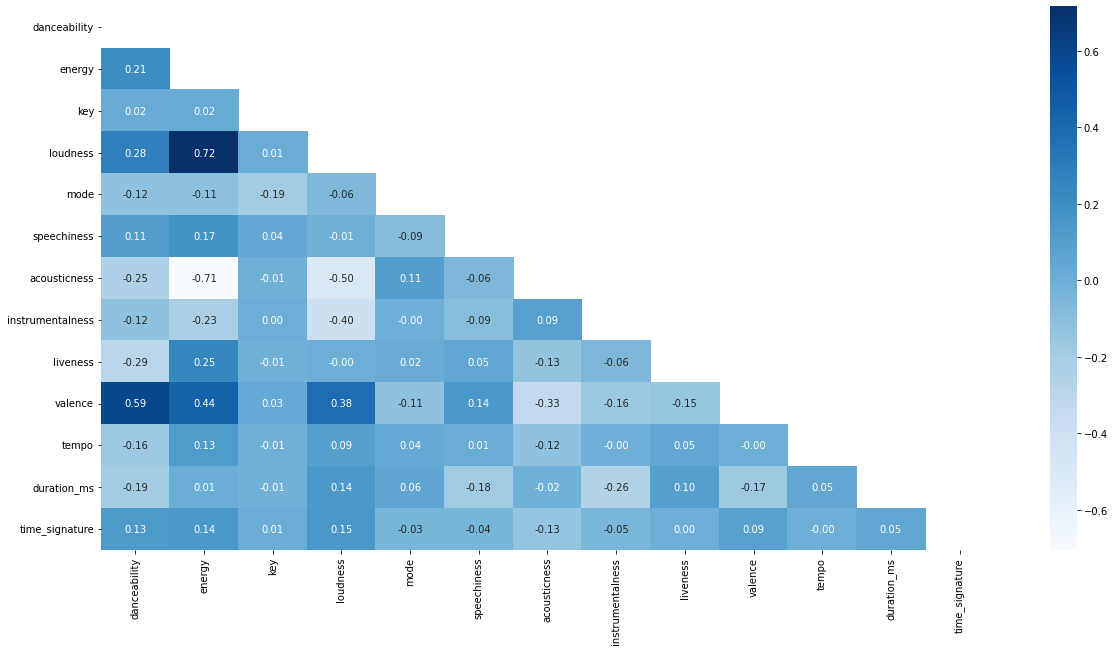

In [ ]:
makeCorr(data[data.select_dtypes(exclude='object').columns], width=20, height=10 )

valence, danceability, energy, loudness




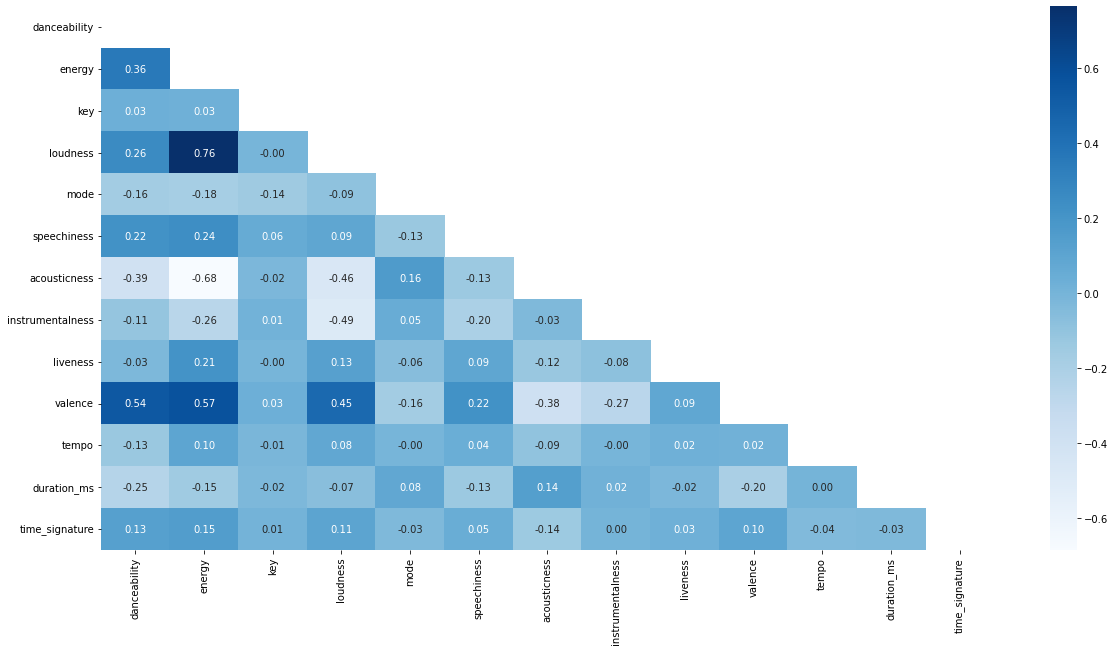

In [ ]:
makeCorr(data2[data2.select_dtypes(exclude='object').columns], width=20, height=10 )

valence, danceability, energy, loudness,( speechiness)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16330 entries, 0 to 16329
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            16330 non-null  object 
 1   Artist_Id         16330 non-null  object 
 2   Album_Name        16330 non-null  object 
 3   Album_Id          16330 non-null  object 
 4   Track_Title       16330 non-null  object 
 5   Track_Id          16322 non-null  object 
 6   danceability      16322 non-null  float64
 7   energy            16322 non-null  float64
 8   key               16322 non-null  float64
 9   loudness          16322 non-null  float64
 10  mode              16322 non-null  float64
 11  speechiness       16322 non-null  float64
 12  acousticness      16322 non-null  float64
 13  instrumentalness  16322 non-null  float64
 14  liveness          16322 non-null  float64
 15  valence           16322 non-null  float64
 16  tempo             16322 non-null  float6

# 전처리

## 결측치제거

In [58]:
data.isnull().sum()

Artist              0
Artist_Id           0
Album_Name          0
Album_Id            0
Track_Title         0
Track_Id            8
danceability        8
energy              8
key                 8
loudness            8
mode                8
speechiness         8
acousticness        8
instrumentalness    8
liveness            8
valence             8
tempo               8
duration_ms         8
time_signature      8
dtype: int64

In [59]:
data[data.Track_Id.isnull()]

,Artist,Artist_Id,Album_Name,Album_Id,Track_Title,Track_Id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
149,SECHSKIES,6uRyNreOHUvWPNGnKfIo27,2016 Re-ALBUM,3RLZMnWVAtvQPy0G4FvRGs,COME TO ME BABY (2016),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6106,BTOB,2hcsKca6hCfFMwwdbFvenJ,24/7 (TWENTY FOUR/SEVEN),7o7pJKWt8DxE7H17rXrEaj,Beyond the time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8125,Drunken Tiger,1kcYSWblYWOOMVOPNgbMYI,Drunken Tiger X: Rebirth of Tiger Jk,0dSDs3V1AH4jANHJueedGV,Intro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8431,Epik High,5snNHNlYT2UrtZo5HCJkiw,WE'VE DONE SOMETHING WONDERFUL,7tvK9KQebPOhD9baTlIrVu,BLEED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12665,Seotaiji,3yj6KT6cRFojlL37psQ1dV,Seotaiji 7th Issue,2mcYHNYX9eVsCg5C7untyL,Intro (For Zero Tour) - '04 Zero [Live],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13377,Hwang Chi Yeul,689wBe4v9rvHjdNB4JUgYq,The Four Seasons,3KGD2F79OWc4D6yPM4z7hW,A Walk To Goodbye,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14026,Kim Jong Kook,60YNqzrSj7rJkuqHkpHPqG,Here I Am,2s12iviLT6fAPDDVJyr0Th,고맙다,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15390,Lee Seung Chul,5Ecf8RR2UWFAvyeItabffF,청연 (Original Soundtrack),51Up0SNMGyG6lWKPM7bJ5X,인연,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
data=data.dropna(axis=0)
data.isnull().sum()

Artist              0
Artist_Id           0
Album_Name          0
Album_Id            0
Track_Title         0
Track_Id            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [61]:
data2.isnull().sum()

Artist               0
Artist_Id            0
Single_Album_Name    0
Single_Album_Id      0
Track_Title          0
Track_Id             4
danceability         4
energy               4
key                  4
loudness             4
mode                 4
speechiness          4
acousticness         4
instrumentalness     4
liveness             4
valence              4
tempo                4
duration_ms          4
time_signature       4
dtype: int64

In [62]:
data2[data2.Track_Id.isna()]

,Artist,Artist_Id,Single_Album_Name,Single_Album_Id,Track_Title,Track_Id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
956,INFINITE,1bkpTEmumLC3xc7HgMsttU,She's Back,18kkqDFI0f0M2U7KThjcGC,She's Back (Remix),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3625,PENTAGON,1wKpMkucynaTfG8lyPprYV,"Sugar Man 3, Pt. 1",4QFCjjMvKx6OEUK2vA3bpw,Only Love,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5545,Jay Park,4XDi67ZENZcbfKnvMnTYsI,Dior Socks,2RdMO1MRFeRyInGna9zzZb,Dior Socks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10511,Brave Girls,7t5H3uQv0Zw6cQUnSTF5BB,Back to da future,10ujTiAhclo3BVC6O6FNfx,Back to da future,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
data2=data2.dropna(axis=0)
data2.isnull().sum()

Artist               0
Artist_Id            0
Single_Album_Name    0
Single_Album_Id      0
Track_Title          0
Track_Id             0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
dtype: int64

## 중복값 제거
- 가수, 앨범, 타이틀, 키, 모드가 같으면 같은 곡으로 간주

In [64]:
data[data.duplicated(subset=['Artist','Album_Name', 'Track_Title' ,'key','mode'])]

,Artist,Artist_Id,Album_Name,Album_Id,Track_Title,Track_Id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
789,Click-B,2kOGSFThgEzPEjL4fFB25w,Click-B 1st,1wD0a0lKZALago4fMCkoSA,마지막 선물,6fBgzXe4CuYD9xXJJetBly,0.885,0.938,1.0,-3.795,1.0,0.0722,0.00008,0.030700,0.0594,0.901,137.326,185560.0,4.0
974,god,1nTCpd63NkuGGpCIbo4Ywl,Chapter 2,08kxPGUoGQ4zn1bBTInvHA,Dance All Night,2NKvzv5mVANBExsx2cfPFa,0.895,0.754,0.0,-6.106,1.0,0.1470,0.03840,0.000000,0.0635,0.876,102.051,217173.0,4.0
977,god,1nTCpd63NkuGGpCIbo4Ywl,Chapter 2,08kxPGUoGQ4zn1bBTInvHA,Say god,1DQQiiUgHg00pZpOgep0yh,0.924,0.891,11.0,-5.537,0.0,0.1530,0.10100,0.000000,0.0523,0.877,104.053,222067.0,4.0
980,god,1nTCpd63NkuGGpCIbo4Ywl,Chapter 2,08kxPGUoGQ4zn1bBTInvHA,Friday Night,6hl3GBSlDJbh5zBUhA3jVU,0.876,0.747,1.0,-3.807,1.0,0.0554,0.01200,0.000016,0.0479,0.604,110.044,215067.0,4.0
1075,MBLAQ,14f1WN9TUDVBK4sHUStmLG,BLAQ Style,7nEtGoI32qBOQ1VinD31VF,Stay,0Q2uAamKg36f2KH0NSepT7,0.723,0.900,4.0,-3.363,0.0,0.0917,0.00130,0.000000,0.0946,0.480,129.934,200556.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16180,Samuel Seo,4ZPInhlYlpaCsk1vnHmKBP,UNITY,7GLkZmml6n1wP4xZoveIFV,Keep It Simple,6bFNrLA1A2FBN58Fk72cIp,0.641,0.395,9.0,-11.715,0.0,0.2510,0.42800,0.000033,0.3250,0.413,84.916,176521.0,4.0
16181,Samuel Seo,4ZPInhlYlpaCsk1vnHmKBP,UNITY,7GLkZmml6n1wP4xZoveIFV,Pretty,7hPnW7ghtkDKEd6KslAGHx,0.824,0.248,1.0,-9.101,1.0,0.2080,0.44600,0.000000,0.0771,0.676,103.116,200082.0,4.0
16183,Samuel Seo,4ZPInhlYlpaCsk1vnHmKBP,UNITY,7GLkZmml6n1wP4xZoveIFV,Happy Avocado,6pIGTDazlrxxHtSdBBRL1V,0.607,0.495,7.0,-7.376,0.0,0.0945,0.46600,0.000001,0.3610,0.546,101.449,202992.0,4.0
16184,Samuel Seo,4ZPInhlYlpaCsk1vnHmKBP,UNITY,7GLkZmml6n1wP4xZoveIFV,BOEING,59thypx4erhe0N0STpK3CU,0.700,0.552,4.0,-7.088,0.0,0.0263,0.01990,0.000006,0.0854,0.513,113.672,219156.0,4.0


In [65]:
data.drop_duplicates(inplace=True, subset=['Artist','Album_Name', 'Track_Title' ,'key','mode'])
data

,Artist,Artist_Id,Album_Name,Album_Id,Track_Title,Track_Id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,H.O.T.,5JrfgZAgqAMywJpLpJM0eS,FOREVER 2001 LIVE CONCERT,697cPaD568S5Zt4bgo4cQf,Opening - Live,6KOn7RweqUBSZWoKKkHFRb,0.209,0.963,6.0,-12.900,0.0,0.1330,0.00009,0.913000,0.3220,0.0829,131.864,90333.0,4.0
1,H.O.T.,5JrfgZAgqAMywJpLpJM0eS,FOREVER 2001 LIVE CONCERT,697cPaD568S5Zt4bgo4cQf,I yah! - Live,1khANf67sdS8kUkjmF218J,0.397,0.901,4.0,-6.970,1.0,0.2850,0.06650,0.000000,0.8880,0.2580,171.944,278333.0,4.0
2,H.O.T.,5JrfgZAgqAMywJpLpJM0eS,FOREVER 2001 LIVE CONCERT,697cPaD568S5Zt4bgo4cQf,Git It Up! / 전사의 후예 / You Got Gun - Live,4XkT2bHdbHMPukCpj7mXPJ,0.542,0.913,1.0,-7.763,1.0,0.2410,0.10800,0.000315,0.8900,0.3770,97.051,320533.0,4.0
3,H.O.T.,5JrfgZAgqAMywJpLpJM0eS,FOREVER 2001 LIVE CONCERT,697cPaD568S5Zt4bgo4cQf,Opening Ment - Live,65a4TY00ChiawzHVH4xcDO,0.436,0.666,10.0,-14.143,0.0,0.6320,0.92500,0.000267,0.8550,0.0800,107.013,284427.0,5.0
4,H.O.T.,5JrfgZAgqAMywJpLpJM0eS,FOREVER 2001 LIVE CONCERT,697cPaD568S5Zt4bgo4cQf,It's Been Raining Since You Left Me / Delight ...,3vYZaL9lMZ1uKURbcEq4Jz,0.366,0.778,7.0,-9.239,0.0,0.0714,0.16400,0.000214,0.8910,0.4040,99.995,278667.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16325,JUNNY,0lgENJQUkqkDbpsTYEayOr,A.G.E. (21),017Parh84mQX971tanFvY3,Trilla,67uELoJ1RBuTE20cHc05n2,0.650,0.518,2.0,-6.805,0.0,0.0645,0.04170,0.000000,0.0714,0.4020,91.042,255469.0,4.0
16326,JUNNY,0lgENJQUkqkDbpsTYEayOr,A.G.E. (21),017Parh84mQX971tanFvY3,Years (Interlude),6d1GoPinQWPkheUFhrCyDE,0.703,0.432,2.0,-11.023,1.0,0.0486,0.18300,0.059200,0.1080,0.3060,97.999,121297.0,4.0
16327,JUNNY,0lgENJQUkqkDbpsTYEayOr,A.G.E. (21),017Parh84mQX971tanFvY3,Age,3HsLOAQMUMuQ4lbFqTAtcf,0.655,0.682,0.0,-5.064,1.0,0.0586,0.06310,0.000000,0.1320,0.4510,124.889,172219.0,4.0
16328,JUNNY,0lgENJQUkqkDbpsTYEayOr,A.G.E. (21),017Parh84mQX971tanFvY3,Getaway,2LtJyD2mIaSUaUnxZmHjNC,0.614,0.747,10.0,-5.268,0.0,0.1980,0.01440,0.000001,0.0935,0.2770,134.833,234000.0,4.0


In [26]:
data.columns

Index(['Artist', 'Artist_Id', 'Album_Name', 'Album_Id', 'Track_Title',
       'Track_Id', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [24]:
data2.columns

Index(['Artist', 'Artist_Id', 'Single_Album_Name', 'Single_Album_Id',
       'Track_Title', 'Track_Id', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [74]:
data2.drop_duplicates(inplace=True, subset=['Artist','Single_Album_Name', 'Track_Title' ,'key','mode'])
data2

,Artist,Artist_Id,Single_Album_Name,Single_Album_Id,Track_Title,Track_Id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,SECHSKIES,6uRyNreOHUvWPNGnKfIo27,DON'T LOOK BACK,63fxv7o113Zji3oLeXgswm,DON’T LOOK BACK,3szqGZtiiS8hmIPcT9qBgh,0.535,0.484,0.0,-8.209,1.0,0.0301,0.6780,0.000002,0.1080,0.233,124.038,249263.0,4.0
1,SECHSKIES,6uRyNreOHUvWPNGnKfIo27,ALL FOR YOU,7vqIRL00YfTtuO0sSAK3Uv,ALL FOR YOU,4jB0ikdBeXiIIP97TPXIPt,0.622,0.756,4.0,-4.838,0.0,0.0473,0.0705,0.000000,0.1080,0.718,167.902,242977.0,4.0
2,SECHSKIES,6uRyNreOHUvWPNGnKfIo27,ALL FOR YOU,7vqIRL00YfTtuO0sSAK3Uv,DREAM,5d0AZT2CWAH4mApoiXlTDa,0.676,0.593,11.0,-5.368,1.0,0.0346,0.3030,0.000000,0.1200,0.314,140.011,243714.0,4.0
3,SECHSKIES,6uRyNreOHUvWPNGnKfIo27,ALL FOR YOU,7vqIRL00YfTtuO0sSAK3Uv,MEANINGLESS,2FHTNle5MybRe4k0GfjHFq,0.793,0.799,7.0,-3.051,0.0,0.0318,0.1890,0.000000,0.1120,0.777,122.989,221587.0,4.0
4,SECHSKIES,6uRyNreOHUvWPNGnKfIo27,ALL FOR YOU,7vqIRL00YfTtuO0sSAK3Uv,ROUND & ROUND,0pO0z7133jfdG6MkGA5Mym,0.702,0.702,5.0,-4.210,0.0,0.0290,0.1280,0.000000,0.1210,0.570,130.045,246303.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11008,YUGYEOM,3ohXmy1PGdB3XgzhPqQ0tY,Point Of View: U,0KZ5gVcGCuAEFBDKmWL4bM,All Your Fault (Feat. GRAY),4PP4siQamrO7i5Me9GOpqQ,0.662,0.852,10.0,-1.447,0.0,0.0329,0.1630,0.000000,0.0987,0.560,139.928,181880.0,4.0
11009,YUGYEOM,3ohXmy1PGdB3XgzhPqQ0tY,Point Of View: U,0KZ5gVcGCuAEFBDKmWL4bM,All About U (Feat. Loco),4e9mjh4ptX7jrfLCetHOvD,0.729,0.697,8.0,-2.609,0.0,0.0316,0.2680,0.000000,0.0832,0.530,105.028,224013.0,4.0
11010,YUGYEOM,3ohXmy1PGdB3XgzhPqQ0tY,Point Of View: U,0KZ5gVcGCuAEFBDKmWL4bM,Love The Way (Feat. Jay Park & punchnello),6gLJoEyuuHk1IwrZXWjotF,0.707,0.675,2.0,-3.491,1.0,0.0612,0.1290,0.000000,0.0994,0.368,98.949,181507.0,4.0
11011,YUGYEOM,3ohXmy1PGdB3XgzhPqQ0tY,Point Of View: U,0KZ5gVcGCuAEFBDKmWL4bM,Falling In Love,0sxOwLKkw9EAyxrX9fDRhw,0.578,0.543,9.0,-4.958,1.0,0.0662,0.1630,0.000000,0.0966,0.459,154.771,203627.0,4.0


In [75]:
data2.columns=['Artist', 'Artist_Id', 'Album_Name', 'Album_Id', 'Track_Title',
       'Track_Id', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature']

data2.head()

,Artist,Artist_Id,Album_Name,Album_Id,Track_Title,Track_Id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,SECHSKIES,6uRyNreOHUvWPNGnKfIo27,DON'T LOOK BACK,63fxv7o113Zji3oLeXgswm,DON’T LOOK BACK,3szqGZtiiS8hmIPcT9qBgh,0.535,0.484,0.0,-8.209,1.0,0.0301,0.6780,0.000002,0.108,0.233,124.038,249263.0,4.0
1,SECHSKIES,6uRyNreOHUvWPNGnKfIo27,ALL FOR YOU,7vqIRL00YfTtuO0sSAK3Uv,ALL FOR YOU,4jB0ikdBeXiIIP97TPXIPt,0.622,0.756,4.0,-4.838,0.0,0.0473,0.0705,0.000000,0.108,0.718,167.902,242977.0,4.0
2,SECHSKIES,6uRyNreOHUvWPNGnKfIo27,ALL FOR YOU,7vqIRL00YfTtuO0sSAK3Uv,DREAM,5d0AZT2CWAH4mApoiXlTDa,0.676,0.593,11.0,-5.368,1.0,0.0346,0.3030,0.000000,0.120,0.314,140.011,243714.0,4.0
3,SECHSKIES,6uRyNreOHUvWPNGnKfIo27,ALL FOR YOU,7vqIRL00YfTtuO0sSAK3Uv,MEANINGLESS,2FHTNle5MybRe4k0GfjHFq,0.793,0.799,7.0,-3.051,0.0,0.0318,0.1890,0.000000,0.112,0.777,122.989,221587.0,4.0
4,SECHSKIES,6uRyNreOHUvWPNGnKfIo27,ALL FOR YOU,7vqIRL00YfTtuO0sSAK3Uv,ROUND & ROUND,0pO0z7133jfdG6MkGA5Mym,0.702,0.702,5.0,-4.210,0.0,0.0290,0.1280,0.000000,0.121,0.570,130.045,246303.0,4.0


In [76]:
df=pd.concat([data, data2], axis = 0)
df

,Artist,Artist_Id,Album_Name,Album_Id,Track_Title,Track_Id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,H.O.T.,5JrfgZAgqAMywJpLpJM0eS,FOREVER 2001 LIVE CONCERT,697cPaD568S5Zt4bgo4cQf,Opening - Live,6KOn7RweqUBSZWoKKkHFRb,0.209,0.963,6.0,-12.900,0.0,0.1330,0.00009,0.913000,0.3220,0.0829,131.864,90333.0,4.0
1,H.O.T.,5JrfgZAgqAMywJpLpJM0eS,FOREVER 2001 LIVE CONCERT,697cPaD568S5Zt4bgo4cQf,I yah! - Live,1khANf67sdS8kUkjmF218J,0.397,0.901,4.0,-6.970,1.0,0.2850,0.06650,0.000000,0.8880,0.2580,171.944,278333.0,4.0
2,H.O.T.,5JrfgZAgqAMywJpLpJM0eS,FOREVER 2001 LIVE CONCERT,697cPaD568S5Zt4bgo4cQf,Git It Up! / 전사의 후예 / You Got Gun - Live,4XkT2bHdbHMPukCpj7mXPJ,0.542,0.913,1.0,-7.763,1.0,0.2410,0.10800,0.000315,0.8900,0.3770,97.051,320533.0,4.0
3,H.O.T.,5JrfgZAgqAMywJpLpJM0eS,FOREVER 2001 LIVE CONCERT,697cPaD568S5Zt4bgo4cQf,Opening Ment - Live,65a4TY00ChiawzHVH4xcDO,0.436,0.666,10.0,-14.143,0.0,0.6320,0.92500,0.000267,0.8550,0.0800,107.013,284427.0,5.0
4,H.O.T.,5JrfgZAgqAMywJpLpJM0eS,FOREVER 2001 LIVE CONCERT,697cPaD568S5Zt4bgo4cQf,It's Been Raining Since You Left Me / Delight ...,3vYZaL9lMZ1uKURbcEq4Jz,0.366,0.778,7.0,-9.239,0.0,0.0714,0.16400,0.000214,0.8910,0.4040,99.995,278667.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11008,YUGYEOM,3ohXmy1PGdB3XgzhPqQ0tY,Point Of View: U,0KZ5gVcGCuAEFBDKmWL4bM,All Your Fault (Feat. GRAY),4PP4siQamrO7i5Me9GOpqQ,0.662,0.852,10.0,-1.447,0.0,0.0329,0.16300,0.000000,0.0987,0.5600,139.928,181880.0,4.0
11009,YUGYEOM,3ohXmy1PGdB3XgzhPqQ0tY,Point Of View: U,0KZ5gVcGCuAEFBDKmWL4bM,All About U (Feat. Loco),4e9mjh4ptX7jrfLCetHOvD,0.729,0.697,8.0,-2.609,0.0,0.0316,0.26800,0.000000,0.0832,0.5300,105.028,224013.0,4.0
11010,YUGYEOM,3ohXmy1PGdB3XgzhPqQ0tY,Point Of View: U,0KZ5gVcGCuAEFBDKmWL4bM,Love The Way (Feat. Jay Park & punchnello),6gLJoEyuuHk1IwrZXWjotF,0.707,0.675,2.0,-3.491,1.0,0.0612,0.12900,0.000000,0.0994,0.3680,98.949,181507.0,4.0
11011,YUGYEOM,3ohXmy1PGdB3XgzhPqQ0tY,Point Of View: U,0KZ5gVcGCuAEFBDKmWL4bM,Falling In Love,0sxOwLKkw9EAyxrX9fDRhw,0.578,0.543,9.0,-4.958,1.0,0.0662,0.16300,0.000000,0.0966,0.4590,154.771,203627.0,4.0


In [77]:
cluster_features=['danceability', 'energy', 'valence', 'loudness']
df[cluster_features].isna().sum()

danceability    0
energy          0
valence         0
loudness        0
dtype: int64

In [78]:
cluster_features=['danceability', 'energy', 'valence', 'loudness']
X = MinMaxScaler().fit_transform(df[cluster_features])
kmeans = KMeans(init="k-means++",
                n_clusters=2,
                random_state=15).fit(X)
df['kmeans'] = kmeans.labels_

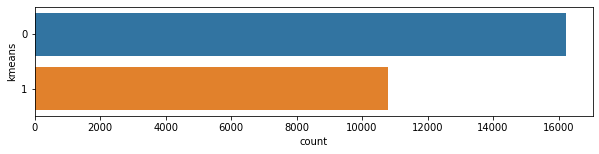

In [83]:
plt.figure( figsize = (10,2) )
sns.countplot( data = df, y = 'kmeans')
plt.show()

In [88]:
df

,Artist,Artist_Id,Album_Name,Album_Id,Track_Title,Track_Id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,kmeans
0,H.O.T.,5JrfgZAgqAMywJpLpJM0eS,FOREVER 2001 LIVE CONCERT,697cPaD568S5Zt4bgo4cQf,Opening - Live,6KOn7RweqUBSZWoKKkHFRb,0.209,0.963,6.0,-12.900,0.0,0.1330,0.00009,0.913000,0.3220,0.0829,131.864,90333.0,4.0,1
1,H.O.T.,5JrfgZAgqAMywJpLpJM0eS,FOREVER 2001 LIVE CONCERT,697cPaD568S5Zt4bgo4cQf,I yah! - Live,1khANf67sdS8kUkjmF218J,0.397,0.901,4.0,-6.970,1.0,0.2850,0.06650,0.000000,0.8880,0.2580,171.944,278333.0,4.0,1
2,H.O.T.,5JrfgZAgqAMywJpLpJM0eS,FOREVER 2001 LIVE CONCERT,697cPaD568S5Zt4bgo4cQf,Git It Up! / 전사의 후예 / You Got Gun - Live,4XkT2bHdbHMPukCpj7mXPJ,0.542,0.913,1.0,-7.763,1.0,0.2410,0.10800,0.000315,0.8900,0.3770,97.051,320533.0,4.0,0
3,H.O.T.,5JrfgZAgqAMywJpLpJM0eS,FOREVER 2001 LIVE CONCERT,697cPaD568S5Zt4bgo4cQf,Opening Ment - Live,65a4TY00ChiawzHVH4xcDO,0.436,0.666,10.0,-14.143,0.0,0.6320,0.92500,0.000267,0.8550,0.0800,107.013,284427.0,5.0,1
4,H.O.T.,5JrfgZAgqAMywJpLpJM0eS,FOREVER 2001 LIVE CONCERT,697cPaD568S5Zt4bgo4cQf,It's Been Raining Since You Left Me / Delight ...,3vYZaL9lMZ1uKURbcEq4Jz,0.366,0.778,7.0,-9.239,0.0,0.0714,0.16400,0.000214,0.8910,0.4040,99.995,278667.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11008,YUGYEOM,3ohXmy1PGdB3XgzhPqQ0tY,Point Of View: U,0KZ5gVcGCuAEFBDKmWL4bM,All Your Fault (Feat. GRAY),4PP4siQamrO7i5Me9GOpqQ,0.662,0.852,10.0,-1.447,0.0,0.0329,0.16300,0.000000,0.0987,0.5600,139.928,181880.0,4.0,0
11009,YUGYEOM,3ohXmy1PGdB3XgzhPqQ0tY,Point Of View: U,0KZ5gVcGCuAEFBDKmWL4bM,All About U (Feat. Loco),4e9mjh4ptX7jrfLCetHOvD,0.729,0.697,8.0,-2.609,0.0,0.0316,0.26800,0.000000,0.0832,0.5300,105.028,224013.0,4.0,0
11010,YUGYEOM,3ohXmy1PGdB3XgzhPqQ0tY,Point Of View: U,0KZ5gVcGCuAEFBDKmWL4bM,Love The Way (Feat. Jay Park & punchnello),6gLJoEyuuHk1IwrZXWjotF,0.707,0.675,2.0,-3.491,1.0,0.0612,0.12900,0.000000,0.0994,0.3680,98.949,181507.0,4.0,1
11011,YUGYEOM,3ohXmy1PGdB3XgzhPqQ0tY,Point Of View: U,0KZ5gVcGCuAEFBDKmWL4bM,Falling In Love,0sxOwLKkw9EAyxrX9fDRhw,0.578,0.543,9.0,-4.958,1.0,0.0662,0.16300,0.000000,0.0966,0.4590,154.771,203627.0,4.0,1


In [86]:
obj_col=df.select_dtypes("object").columns
obj_col

Index(['Artist', 'Artist_Id', 'Album_Name', 'Album_Id', 'Track_Title',
       'Track_Id'],
      dtype='object')

In [89]:
y=df['kmeans']
x=df.drop(columns=['Artist', 'Artist_Id', 'Album_Name', 'Album_Id', 'Track_Title', 'Track_Id','kmeans'], axis=1)

In [95]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model=LGBMClassifier().fit(x_train,y_train)

In [97]:
model.score(x_train,y_train)

1.0

In [98]:
model.score(x_test,y_test)

0.9933358015549797

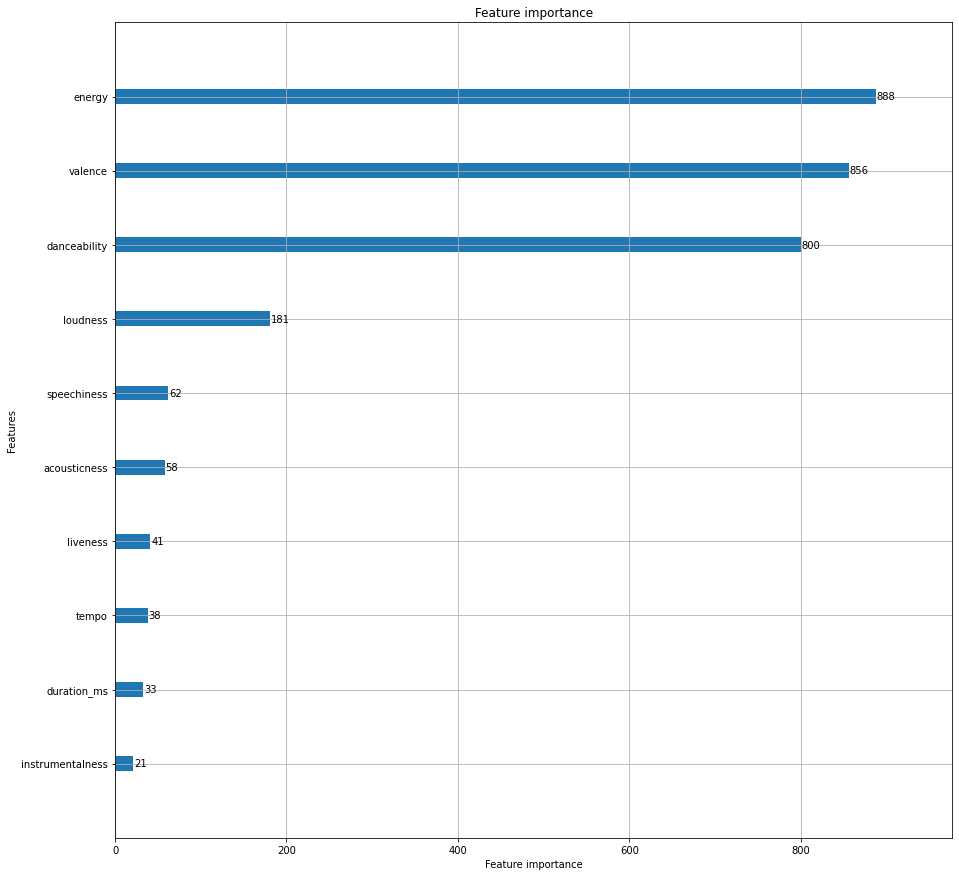

In [99]:
ax = lightgbm.plot_importance(model, max_num_features=10, figsize=(15,15))
plt.show()

In [104]:
cluster=df.groupby(by=df['kmeans'])
clustering_df=cluster.apply(lambda x: x.sort_values(['Artist'],ascending=False))
clustering_df

Artist               Artist_Id              Album_Name  \
kmeans                                                                     
0      6523   punchnello  5enwJ9yOnKlCP91ov4Dqhv                    LIME   
       6509   punchnello  5enwJ9yOnKlCP91ov4Dqhv               ordinary.   
       6505   punchnello  5enwJ9yOnKlCP91ov4Dqhv                   fine!   
       6508   punchnello  5enwJ9yOnKlCP91ov4Dqhv                      23   
       10000  punchnello  5enwJ9yOnKlCP91ov4Dqhv             Demon Youth   
...                  ...                     ...                     ...   
1      3124     (G)I-DLE  2AfmfGFbe0A0WsTYm0SDTx  Sugar Man 3, EPISODE.8   
       3123     (G)I-DLE  2AfmfGFbe0A0WsTYm0SDTx  Sugar Man 3, EPISODE.8   
       3122     (G)I-DLE  2AfmfGFbe0A0WsTYm0SDTx  Sugar Man 3, EPISODE.8   
       3121     (G)I-DLE  2AfmfGFbe0A0WsTYm0SDTx  Sugar Man 3, EPISODE.8   
       3098     (G)I-DLE  2AfmfGFbe0A0WsTYm0SDTx                    HWAA   

                            Album_Id                        Track_Title  \
kmeans                                                                    
0      6523   0upFLpD2srO2KXYskkGMjK                      GREEN HORIZON   
       6509   5KxykJIMpVCFZ7zow2Td0k    Blue Hawaii (Prod. by 0channel)   
       6505   0PS4f64PLmmhCAwFvscJIl            fine! (Feat. Kid Milli)   
       6508   7CzfSGBBmfFwiw1bHD9r6k                                 23   
       10000  4YPACcqstZ7TVAsuTB8yIF            Run It! (Feat. Konsole)   
...                              ...                                ...   
1      3124   3VtVsf2dc0ehH7aovDN2oo  Our little promise - Instrumental   
       3123   3VtVsf2dc0ehH7aovDN2oo                Show - Instrumental   
       3122   3VtVsf2dc0ehH7aovDN2oo                 Our little promise   
       3121   3VtVsf2dc0ehH7aovDN2oo                               Show   
       3098   1M1d5bzsGhY2JOVD2AU29G             HWAA - Chinese Version   

                            Track_Id  danceability  energy   key  loudness  \
kmeans                                                                       
0      6523   4tjoRdZYO1P1PqVYaWli72         0.950   0.888  11.0    -4.609   
       6509   1UHBO2hljyZzjaGeGGJrKF         0.776   0.796  10.0    -6.994   
       6505   7gxi8TAbdZaG0DYKv05237         0.661   0.607   9.0    -6.026   
       6508   4g98uQ39ekHcOAu6gWQnpK         0.679   0.733   1.0    -6.436   
       10000  7dJ8MKhSg1PIES3XUtYlsU         0.551   0.960   7.0    -3.559   
...                              ...           ...     ...   ...       ...   
1      3124   67I3gB2eDNSA34udG1Plti         0.414   0.224   5.0   -10.471   
       3123   26r2po5z04eKuxFMMlqX9i         0.431   0.876   5.0    -4.561   
       3122   4LoLaM5v6t3CMeiAyAiqhm         0.358   0.306   5.0    -6.913   
       3121   7HeCICULVfBGaJcIRXD0VR         0.455   0.841   2.0    -2.714   
       3098   6aw3j3O2RO1GvZn7Mw48wo         0.625   0.836   6.0    -3.488   

              mode  speechiness  acousticness  instrumentalness  liveness  \
kmeans                                                                      
0      6523    1.0       0.1850       0.09680          0.000000    0.1050   
       6509    0.0       0.0578       0.69300          0.000152    0.1100   
       6505    0.0       0.3230       0.56700          0.000000    0.1220   
       6508    1.0       0.3760       0.67200          0.000000    0.2200   
       10000   1.0       0.4020       0.46500          0.000011    0.2180   
...            ...          ...           ...               ...       ...   
1      3124    1.0       0.0329       0.95300          0.289000    0.1040   
       3123    1.0       0.0444       0.00972          0.878000    0.1890   
       3122    1.0       0.0310       0.87200          0.000000    0.0960   
       3121    0.0       0.0777       0.09480          0.000000    0.1500   
       3098    0.0       0.0751       0.03290          0.000000    0.0835   

              valence    tempo  dura